# KAN fitting functions

In [1]:
!pip install pykan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.3/77.3 kB 2.0 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neural_network,pipeline,preprocessing,linear_model
import sklearn
import torch
from kan import KAN


# Dataset

In [3]:
torch.manual_seed(0)

N = 2000

X=2*(torch.rand(N)*2-1)
y=torch.exp(torch.sin(X*np.pi)**2)*np.random.uniform(low=1.0, high=1.3, size=N)#torch.randint(low = 2, high = 5, size = (500,))

In [4]:
test_ids=sorted(np.random.randint(0,len(X),200))
train_ids=np.array(list(set(np.arange(len(X))) - set(test_ids)))
X_train=X[train_ids]
X_test=X[test_ids]
args= torch.argsort(X_test)

X_test=X_test[args]
y_train=y[train_ids]
y_test=y[test_ids][args]

my_ds= {"train_input":X_train.reshape(-1,1),
"test_input":X_test.reshape(-1,1),
"train_label":y_train.reshape(-1,1),
"test_label":y_test.reshape(-1,1)}

In [5]:
print(y_test[:20])
print(X_test[:20])

tensor([1.2087, 1.1203, 1.0899, 1.2864, 1.3016, 1.2920, 1.0351, 1.3392, 1.1990,
        1.2535, 1.3172, 1.7088, 1.6067, 2.1699, 1.8161, 2.4869, 2.6562, 2.6824,
        2.7088, 2.8599], dtype=torch.float64)
tensor([-1.9983, -1.9974, -1.9887, -1.9863, -1.9815, -1.9584, -1.9563, -1.9194,
        -1.8956, -1.8674, -1.8313, -1.8072, -1.7947, -1.7289, -1.7284, -1.6880,
        -1.6616, -1.6015, -1.5521, -1.5500])


## Print dataset

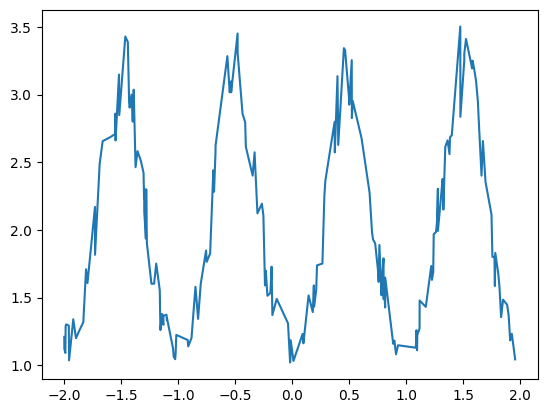

In [6]:
plt.plot(X_test, y_test)

# Spline model



## View model
- Ridge & alpha
- Spline transformer & knots

In [7]:
spline_model = sklearn.pipeline.make_pipeline(sklearn.preprocessing.SplineTransformer(n_knots=50, degree=3),
                                       sklearn.linear_model.Ridge(alpha=1e-3))
spline_model.fit(X_train.reshape(-1,1), y_train)

Pipeline(steps=[('splinetransformer', SplineTransformer(n_knots=50)),
                ('ridge', Ridge(alpha=0.001))])

# MLP model
## Currently linear regression

In [8]:
regr = sklearn.neural_network.MLPRegressor(random_state=1, max_iter=1000).fit(X_train.reshape(-1,1), y_train)

# KAN model

## Model

- Grid (grid intervals for spline finess)
- k (spline order)

In [9]:
kan_model = KAN(width=[1, 2, 2, 1], grid=5, k=5, seed=0)

checkpoint directory created: ./model
saving model version 0.0


## Training

In [10]:
kan_model.fit(my_ds, opt="Adam", steps=800, lamb=0.001, lamb_entropy=10.);

| train_loss: 2.05e+11 | test_loss: 1.91e+11 | reg: 1.61e+08 | : 100%|█| 800/800 [00:44<00:00, 17.90

saving model version 0.1


# Predictions

MLP MSE is 0.0571053049782101
Spline MSE is 0.02565993451688683
KAN MSE is 3.6633554060842145e+22


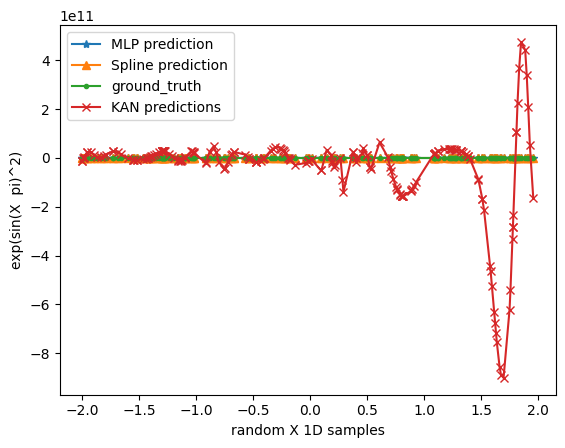

In [11]:
mlp_preds=regr.predict(X_test.reshape(-1,1))
spline_preds=spline_model.predict(X_test.reshape(-1,1))
KAN_preds=kan_model(my_ds['test_input']).detach().numpy()

plt.plot(X_test,mlp_preds,'*-',label='MLP prediction')
plt.plot(X_test,spline_preds,'^-',label='Spline prediction')
plt.plot(X_test,y_test,".-",label='ground_truth')
plt.plot(my_ds['test_input'],KAN_preds,'x-',label='KAN predictions')
plt.xlabel("random X 1D samples")
plt.ylabel("exp(sin(X  pi)^2)")
plt.legend()

print(f"MLP MSE is {sklearn.metrics.mean_squared_error(y_test,mlp_preds)}")
print(f"Spline MSE is {sklearn.metrics.mean_squared_error(y_test,spline_preds)}")
print(f"KAN MSE is {sklearn.metrics.mean_squared_error(y_test,KAN_preds)}")

# Plotting KAN model

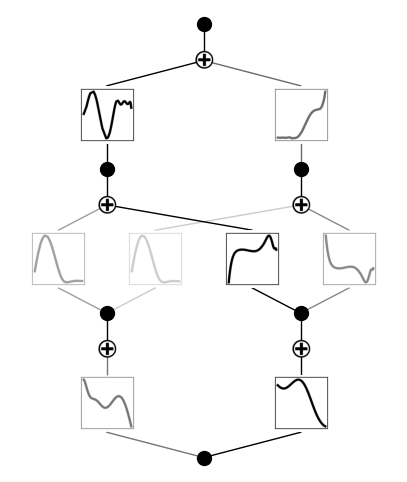

In [12]:
kan_model.plot()